# Play the dungeon MDP

In [1]:
import sys
sys.path.append('../mdp/')
from dungeon import DungeonMDP
import numpy as np
from IPython.display import clear_output, display, HTML

In [2]:
mdp = DungeonMDP()

In [4]:
R = 0
current_room = list(mdp.start())[0]
options = mdp.actions(current_room)
messages = {
    'E': '<h2>You are in an empty room. There are 2 doors.</h2>',
    'M': '<h2>O God, you meet a monster! Your gold has been stolen!</h2',
    'T': '<h2>There is a treasure! Very good...</h2>',
    'O': '<h2>The exit finally!</h2>'
}

exit = False

while not exit:
    display(HTML(messages[current_room]))
    display(HTML('<h3>Your reward for this exploration is <span style="color: #FF0000;">{}</span></h3>'.format(R)))
    
    choice = input('Choose between these possible actions {}\n\n'.format(options))
    if choice.upper() in options and current_room != 'O':
        action = choice.upper()
        next_stages = mdp.successors(current_room, action)
        next_rooms = [s_prime for s_prime, p, r in next_stages]
        p = [p for s_prime, p, r in next_stages]
        next_room = np.random.choice(next_rooms, p=p)
        reward = mdp.reward(current_room, action, next_room)
        current_room = next_room
        R += reward
    else:
        display(HTML('<h1>Game is finished. Your total reward is {}</h1>'.format(R)))
        exit = True
    clear_output(wait=True)

Choose between these possible actions {'L', 'R'}

rl


## Q-learning

In [5]:
from algorithms import Qlearning
from utils import show_q_learning, plot_algorithms
import pandas as pd

In [6]:
Q, history, rewards = Qlearning(mdp, num_episodes=2000)

In [7]:
pd.DataFrame(Q).T

,L,R
E,1.549463,-3.899470
T,1.214419,-2.700433
O,0.000000,0.000000
M,1.180098,-1.818946


In [8]:
show_q_learning(history)

,L,R
E,0.002397,0.001189
T,-0.098230,-0.103344
O,0.000000,0.000000
M,0.000000,0.200602


quit


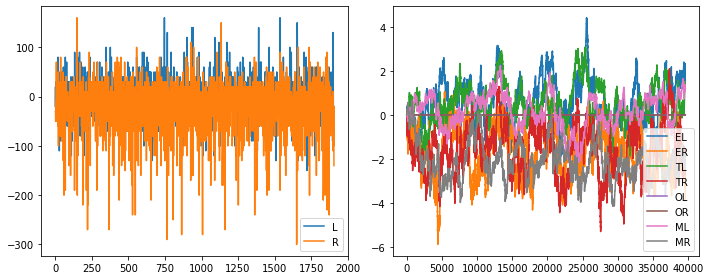

In [9]:
plot_algorithms(history, rewards)

## SARSA

In [10]:
from algorithms import sarsa

In [11]:
Q, history, rewards = sarsa(mdp, num_episodes=2000)

In [12]:
pd.DataFrame(Q).T

,L,R
E,-3.746760,-7.007529
T,-4.314393,-6.657992
O,0.000000,0.000000
M,-4.416021,-5.471047


In [13]:
show_q_learning(history)

,L,R
E,0.095438,-0.196994
T,0.000000,0.001563
O,0.000000,0.000000
M,0.000000,0.100000


quit


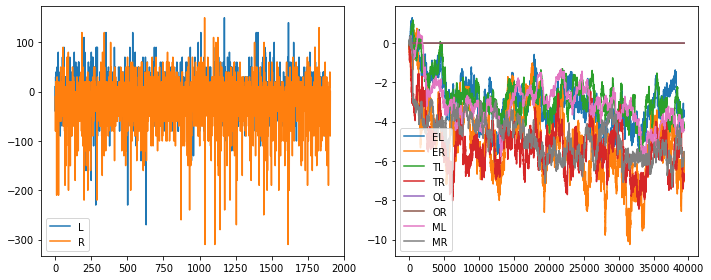

In [14]:
plot_algorithms(history, rewards)

## SARSA($\lambda$)

In [15]:
from algorithms import sarsa_lambda

In [16]:
Q, history, rewards = sarsa_lambda(mdp, num_episodes=2000)

In [17]:
pd.DataFrame(Q).T

,L,R
E,-3.793104,-7.149637
T,-5.640006,-5.671555
O,0.000000,0.000000
M,-2.862416,-4.194432


In [18]:
show_q_learning(history)

,L,R
E,-0.211822,-0.277663
T,0.042710,0.216530
O,0.000000,0.000000
M,0.331493,0.000000


quit


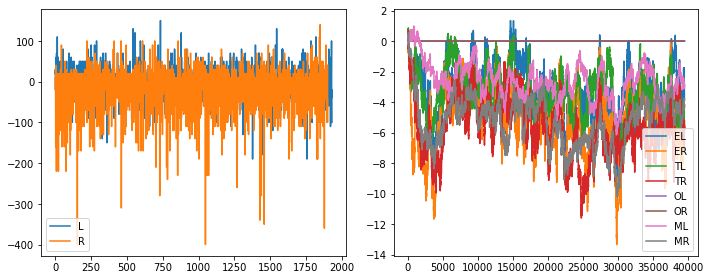

In [19]:
plot_algorithms(history, rewards)